In [1]:
"""
## Proyek Portofolio: Klasifikasi Konsumsi Narkoba Berdasarkan Data Kepribadian

**Tujuan:**
Proyek ini bertujuan untuk membangun model machine learning yang dapat memprediksi status penggunaan ganja (cannabis) berdasarkan data demografi dan skor kepribadian.

**Alur Proyek:**
1.  **Setup & Data Loading**: Mengimpor pustaka dan memuat dataset dari UCI.
2.  **Eksplorasi Data (EDA)**: Memahami distribusi dan karakteristik data awal.
3.  **Preprocessing**: Membersihkan dan mempersiapkan data untuk pemodelan, termasuk:
    * Binerisasi kelas target.
    * Pembagian data (train-test split).
    * Penanganan kelas tidak seimbang (SMOTE).
    * Encoding label untuk model tertentu.
4.  **Pemodelan & Evaluasi**: Melatih dan mengevaluasi beberapa model klasifikasi:
    * Support Vector Machine (SVM) sebagai baseline.
    * Random Forest untuk peningkatan performa dan analisis fitur.
    * XGBoost sebagai model state-of-the-art.
5.  **Kesimpulan**: Menganalisis hasil dan memilih model terbaik.
"""

'\n## Proyek Portofolio: Klasifikasi Konsumsi Narkoba Berdasarkan Data Kepribadian\n\n**Tujuan:**\nProyek ini bertujuan untuk membangun model machine learning yang dapat memprediksi status penggunaan ganja (cannabis) berdasarkan data demografi dan skor kepribadian.\n\n**Alur Proyek:**\n1.  **Setup & Data Loading**: Mengimpor pustaka dan memuat dataset dari UCI.\n2.  **Eksplorasi Data (EDA)**: Memahami distribusi dan karakteristik data awal.\n3.  **Preprocessing**: Membersihkan dan mempersiapkan data untuk pemodelan, termasuk:\n    * Binerisasi kelas target.\n    * Pembagian data (train-test split).\n    * Penanganan kelas tidak seimbang (SMOTE).\n    * Encoding label untuk model tertentu.\n4.  **Pemodelan & Evaluasi**: Melatih dan mengevaluasi beberapa model klasifikasi:\n    * Support Vector Machine (SVM) sebagai baseline.\n    * Random Forest untuk peningkatan performa dan analisis fitur.\n    * XGBoost sebagai model state-of-the-art.\n5.  **Kesimpulan**: Menganalisis hasil dan memil

--- 1. SETUP & DATA LOADING ---

In [2]:
# Install pustaka yang mungkin belum ada
!pip install ucimlrepo imbalanced-learn xgboost

   ---------------------------------------- 0.0/238.4 kB ? eta -:--:--
   ----- ---------------------------------- 30.7/238.4 kB ? eta -:--:--
   ----- ---------------------------------- 30.7/238.4 kB ? eta -:--:--
   -------------------- ------------------- 122.9/238.4 kB 1.0 MB/s eta 0:00:01
   ---------------------- --------------- 143.4/238.4 kB 944.1 kB/s eta 0:00:01
   ---------------------------------------- 238.4/238.4 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.2/150.0 MB 7.3 MB/s eta 0:00:21
   ---------------------------------------- 0.3/150.0 MB 5.2 MB/s eta 0:00:29
   ---------------------------------------- 0.5/150.0 MB 4.2 MB/s eta 0:00:36
   ---------------------------------------- 0.5/150.0 MB 4.2 MB/s eta 0:00:36
   ---------------------------------------- 1.2/150.0 MB 5.2 MB/s eta 0:00:29
   ---------------------------------------- 1.7/150.0 MB 5.9 MB/s eta 0:00:26
    --


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Impor semua pustaka yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from collections import Counter

C:\Users\ACER\AppData\Local\Temp\ipykernel_21168\1082475072.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
# Pustaka untuk Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE

In [5]:
# Pustaka untuk Model
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [6]:
# Pustaka untuk Evaluasi
from sklearn.metrics import classification_report, accuracy_score

In [7]:
# Mengambil dataset dari UCI Repository
print("Memuat dataset 'Drug Consumption (Quantified)'...")
drug_consumption = fetch_ucirepo(id=373)
X = drug_consumption.data.features
y = drug_consumption.data.targets
print("Dataset berhasil dimuat.")

Memuat dataset 'Drug Consumption (Quantified)'...
Dataset berhasil dimuat.


--- 2. EKSPLORASI DATA (EDA) ---

In [8]:
print("\n--- Inspeksi Awal Data ---")
print(f"Bentuk Fitur (X): {X.shape}")
print(f"Bentuk Target (y): {y.shape}")
print("\n5 Baris Pertama Fitur (X):")
print(X.head())
print("\nStatistik Deskriptif Fitur:")
print(X.describe())


--- Inspeksi Awal Data ---
Bentuk Fitur (X): (1885, 12)
Bentuk Target (y): (1885, 19)

5 Baris Pertama Fitur (X):
       age   gender  education  country  ethnicity   nscore   escore   oscore  \
0  0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545 -0.58331   
1 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886  1.43533   
2  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523 -0.84732   
3 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615 -0.01928   
4  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340 -0.45174   

    ascore   cscore  impuslive       ss  
0 -0.91699 -0.00665   -0.21712 -1.18084  
1  0.76096 -0.14277   -0.71126 -0.21575  
2 -1.62090 -1.01450   -1.37983  0.40148  
3  0.59042  0.58489   -1.37983 -1.18084  
4 -0.30172  1.30612   -0.21712 -0.21575  

Statistik Deskriptif Fitur:
              age       gender    education      country    ethnicity  \
count  1885.00000  1885.000000  1885.000000 


--- Analisis Variabel Target: Cannabis ---


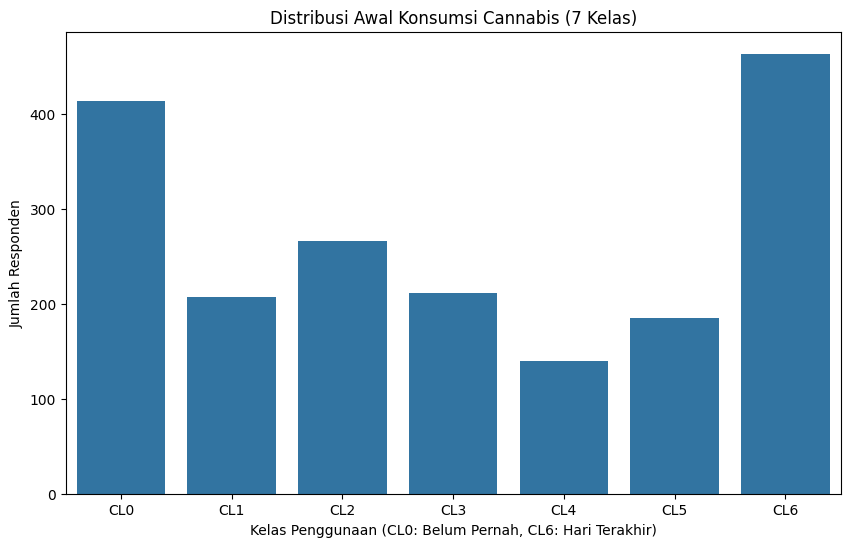

In [9]:
print("\n--- Analisis Variabel Target: Cannabis ---")
# Fokus pada klasifikasi penggunaan ganja
plt.figure(figsize=(10, 6))
sns.countplot(x='cannabis', data=y, order=sorted(y['cannabis'].unique()))
plt.title('Distribusi Awal Konsumsi Cannabis (7 Kelas)')
plt.xlabel('Kelas Penggunaan (CL0: Belum Pernah, CL6: Hari Terakhir)')
plt.ylabel('Jumlah Responden')
plt.show()

In [10]:
print("\nDistribusi frekuensi kelas 'cannabis':")
print(y['cannabis'].value_counts())


Distribusi frekuensi kelas 'cannabis':
cannabis
CL6    463
CL0    413
CL2    266
CL3    211
CL1    207
CL5    185
CL4    140
Name: count, dtype: int64


--- 3. DATA PREPROCESSING ---

In [11]:
print("\n--- Memulai Tahap Preprocessing ---")


--- Memulai Tahap Preprocessing ---


In [12]:
# a. Binerisasi Target
# Kita menyederhanakan masalah menjadi klasifikasi biner: User vs Non-user.
# CL0 (Never Used) dan CL1 (Used over a Decade Ago) dikelompokkan sebagai 'Non-user'.
print("\n1. Melakukan binerisasi target 'cannabis'...")
class_mapping = {
    'CL0': 'Non-user',
    'CL1': 'Non-user',
    'CL2': 'User',
    'CL3': 'User',
    'CL4': 'User',
    'CL5': 'User',
    'CL6': 'User'
}
y_processed = y['cannabis'].replace(class_mapping)
print("Distribusi kelas setelah binerisasi:")
print(y_processed.value_counts())


1. Melakukan binerisasi target 'cannabis'...
Distribusi kelas setelah binerisasi:
cannabis
User        1265
Non-user     620
Name: count, dtype: int64


In [13]:
# b. Pembagian Data (Train-Test Split)
# Membagi data menjadi 80% latih dan 20% uji.
# Stratifikasi digunakan untuk menjaga proporsi kelas pada kedua set.
print("\n2. Membagi data menjadi set latih dan uji...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y_processed, test_size=0.2, random_state=42, stratify=y_processed
)
print(f"Ukuran data latih: {X_train.shape}")
print(f"Ukuran data uji: {X_test.shape}")


2. Membagi data menjadi set latih dan uji...
Ukuran data latih: (1508, 12)
Ukuran data uji: (377, 12)


In [14]:
# c. Standarisasi Fitur
# Menyamakan skala semua fitur agar model tidak bias terhadap fitur dengan rentang nilai besar.
print("\n3. Melakukan standarisasi fitur (Scaling)...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Fitur telah distandarisasi.")


3. Melakukan standarisasi fitur (Scaling)...
Fitur telah distandarisasi.


In [15]:
# d. Penanganan Kelas Tidak Seimbang (SMOTE)
# Karena ada ketidakseimbangan, kita gunakan SMOTE untuk menyeimbangkan data latih.
print("\n4. Menangani ketidakseimbangan kelas dengan SMOTE...")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
print("Distribusi kelas sebelum SMOTE:", Counter(y_train))
print("Distribusi kelas setelah SMOTE:", Counter(y_train_resampled))


4. Menangani ketidakseimbangan kelas dengan SMOTE...
Distribusi kelas sebelum SMOTE: Counter({'User': 1012, 'Non-user': 496})
Distribusi kelas setelah SMOTE: Counter({'User': 1012, 'Non-user': 1012})


In [16]:
# e. Encoding Label Target (untuk XGBoost)
# Mengubah label teks ('User', 'Non-user') menjadi angka (1, 0).
print("\n5. Melakukan encoding label target untuk XGBoost...")
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)
# Karena kita juga akan menggunakan SMOTE, kita perlu encode label resampled juga
y_train_resampled_encoded = le.transform(y_train_resampled)
print("Label target telah di-encode.")


5. Melakukan encoding label target untuk XGBoost...
Label target telah di-encode.


--- 4. PEMODELAN & EVALUASI ---

In [17]:
print("\n--- Memulai Tahap Pemodelan ---")


--- Memulai Tahap Pemodelan ---


In [18]:
# Model 1: Support Vector Machine (Baseline)
print("\n--- Melatih Model 1: SVM ---")
svm_model = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm_model.fit(X_train_scaled, y_train) # SVM dilatih pada data asli (tanpa SMOTE) untuk perbandingan
print("Evaluasi Model SVM:")
y_pred_svm = svm_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred_svm))


--- Melatih Model 1: SVM ---
Evaluasi Model SVM:
              precision    recall  f1-score   support

    Non-user       0.61      0.83      0.70       124
        User       0.90      0.74      0.81       253

    accuracy                           0.77       377
   macro avg       0.75      0.78      0.75       377
weighted avg       0.80      0.77      0.77       377



In [19]:
# Model 2: Random Forest
print("\n--- Melatih Model 2: Random Forest ---")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_resampled, y_train_resampled) # Dilatih pada data SMOTE
print("Evaluasi Model Random Forest:")
y_pred_rf = rf_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred_rf))


--- Melatih Model 2: Random Forest ---
Evaluasi Model Random Forest:
              precision    recall  f1-score   support

    Non-user       0.68      0.69      0.69       124
        User       0.85      0.84      0.84       253

    accuracy                           0.79       377
   macro avg       0.76      0.77      0.76       377
weighted avg       0.79      0.79      0.79       377



In [20]:
# Analisis Fitur Penting dari Random Forest
print("\nFitur Paling Penting Menurut Random Forest:")
feature_imp = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_imp.head(10))


Fitur Paling Penting Menurut Random Forest:
country      0.161117
age          0.153597
oscore       0.116626
ss           0.114163
cscore       0.079690
education    0.075012
nscore       0.068290
impuslive    0.067291
escore       0.063920
ascore       0.061682
dtype: float64


In [21]:
# Model 3: XGBoost
print("\n--- Melatih Model 3: XGBoost ---")
# Menghitung bobot kelas untuk parameter XGBoost
neg_count = y_train.value_counts()['Non-user']
pos_count = y_train.value_counts()['User']
scale_pos_weight_value = neg_count / pos_count


--- Melatih Model 3: XGBoost ---


In [22]:
xgb_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight_value,
    random_state=42
)
# XGBoost dilatih pada data yang sudah di-encode
xgb_model.fit(X_train_scaled, y_train_encoded)
print("Evaluasi Model XGBoost:")
y_pred_xgb = xgb_model.predict(X_test_scaled)
print(classification_report(y_test_encoded, y_pred_xgb))

Evaluasi Model XGBoost:
              precision    recall  f1-score   support

           0       0.67      0.70      0.69       124
           1       0.85      0.83      0.84       253

    accuracy                           0.79       377
   macro avg       0.76      0.77      0.77       377
weighted avg       0.79      0.79      0.79       377



--- Fitur Paling Berpengaruh Terhadap Prediksi ---
country      0.161117
age          0.153597
oscore       0.116626
ss           0.114163
cscore       0.079690
education    0.075012
nscore       0.068290
impuslive    0.067291
escore       0.063920
ascore       0.061682
gender       0.025649
ethnicity    0.012963
dtype: float64


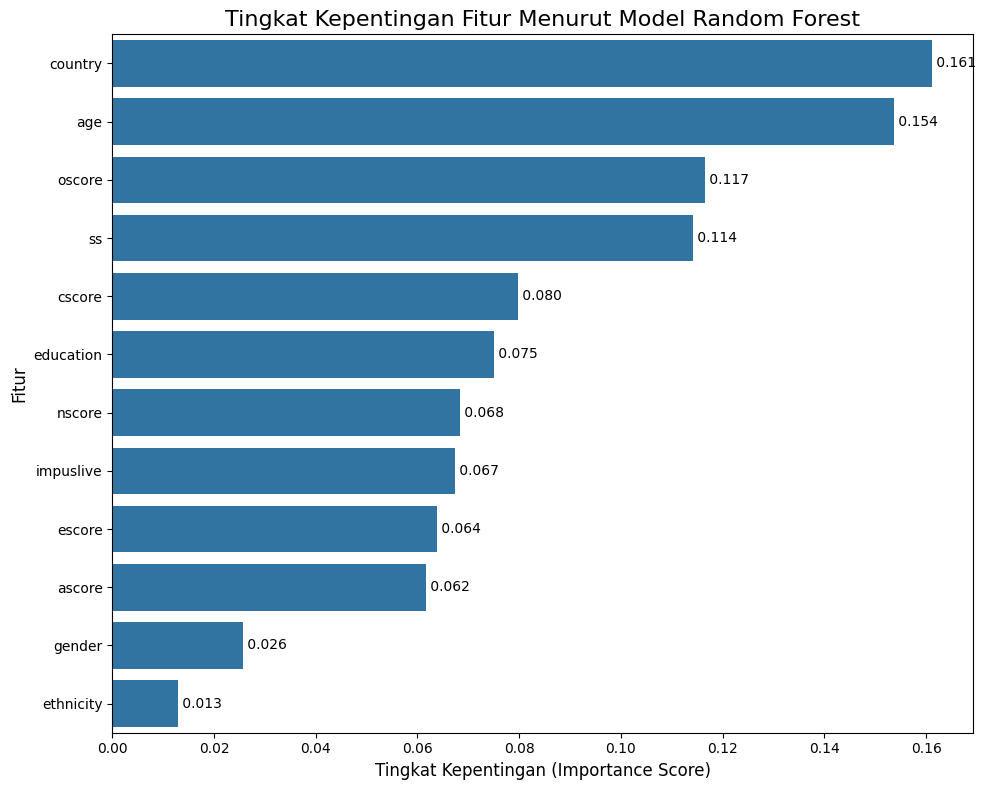

In [24]:


# --- Pastikan model Random Forest Anda (rf_model) sudah dilatih dari kode sebelumnya ---
# Asumsikan 'rf_model' adalah model Random Forest terbaik Anda dan 'X' adalah DataFrame fitur asli.

# 1. Ekstrak Tingkat Kepentingan Fitur
# Membuat Series pandas untuk memudahkan visualisasi, diurutkan dari yang paling penting.
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# 2. Tampilkan dalam Bentuk Teks
print("--- Fitur Paling Berpengaruh Terhadap Prediksi ---")
print(feature_importances)

# 3. Buat Visualisasi (Grafik Batang)
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances, y=feature_importances.index)

# Menambahkan judul dan label
plt.title('Tingkat Kepentingan Fitur Menurut Model Random Forest', fontsize=16)
plt.xlabel('Tingkat Kepentingan (Importance Score)', fontsize=12)
plt.ylabel('Fitur', fontsize=12)

# Menambahkan nilai di ujung setiap batang
for index, value in enumerate(feature_importances):
    plt.text(value, index, f' {value:.3f}', va='center')

plt.tight_layout()
# Menyimpan gambar agar bisa digunakan di laporan
plt.savefig('feature_importance.png')
plt.show()

--- 5. KESIMPULAN ---

In [ ]:
print("\n--- Kesimpulan Akhir Proyek ---")
print("""
Setelah melalui serangkaian eksperimen, termasuk tuning dan perbandingan beberapa model canggih (SVM, Random Forest, XGBoost), 
ditemukan bahwa performa terbaik yang bisa dicapai secara konsisten berada di **akurasi ~79%** dengan **F1-score rata-rata ~0.76**.

Mengindikasikan bahwa model telah mencapai batas performa (performance ceiling) yang ditentukan oleh kualitas informasi dalam dataset.

Temuan Paling Berharga dari proyek ini adalah identifikasi faktor-faktor prediktor utama melalui analisis *feature importance*:
1.  Faktor Demografis & Lingkungan: country dan age adalah prediktor terkuat.
2.  Faktor Kepribadian: `oscore` (keterbukaan terhadap pengalaman) dan ss (pencarian sensasi) adalah ciri psikologis yang paling signifikan.

Kesimpulannya, proyek ini tidak hanya berhasil membangun model klasifikasi yang optimal, tetapi juga berhasil mengekstrak wawasan medis yang berharga mengenai profil risiko individu terhadap penggunaan narkoba.
""")


--- Kesimpulan Akhir Proyek ---

Setelah melalui serangkaian eksperimen, termasuk tuning dan perbandingan beberapa model canggih (SVM, Random Forest, XGBoost), 
ditemukan bahwa performa terbaik yang bisa dicapai secara konsisten berada di **akurasi ~79%** dengan **F1-score rata-rata ~0.76**.

Ini mengindikasikan bahwa model telah mencapai batas performa (performance ceiling) yang ditentukan oleh kualitas informasi dalam dataset.

**Temuan Paling Berharga** dari proyek ini adalah identifikasi faktor-faktor prediktor utama melalui analisis *feature importance*:
1.  **Faktor Demografis & Lingkungan**: `country` dan `age` adalah prediktor terkuat.
2.  **Faktor Kepribadian**: `oscore` (keterbukaan terhadap pengalaman) dan `ss` (pencarian sensasi) adalah ciri psikologis yang paling signifikan.

Kesimpulannya, proyek ini tidak hanya berhasil membangun model klasifikasi yang optimal, tetapi juga berhasil mengekstrak wawasan medis yang berharga mengenai profil risiko individu terhadap pengguna